#HOUSE PRICES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
# !pip install mlxtend --upgrade

##DATA SCIENCE

In [2]:
#Reading data from csv file and presenting sample of it
prices_df = pd.read_csv('house price.csv')
prices_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#Printing the shape 
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
prices_df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
prices_df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
prices_df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
prices_df.duplicated().sum()

0

In [8]:
prices_df.set_index('No',inplace=True)
prices_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##EDA

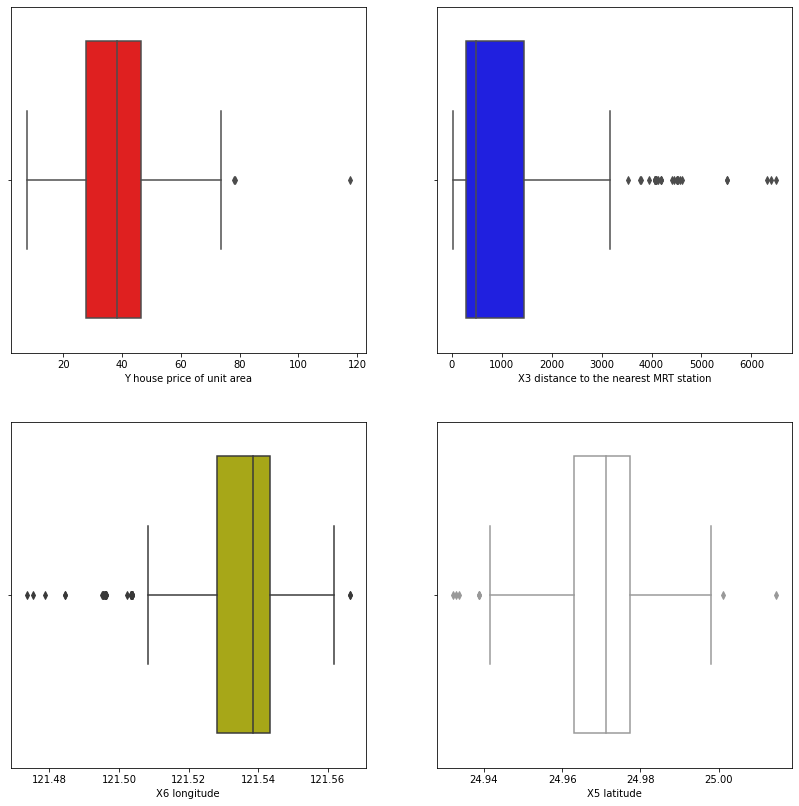

In [9]:
#Finding the outliers :
fig,axes=plt.subplots(2,2,figsize=(14,14))
sns.boxplot(data = prices_df , x = 'Y house price of unit area' , ax = axes[0,0] , color ='r')
sns.boxplot(data = prices_df , x = 'X3 distance to the nearest MRT station'  , ax = axes[0,1] , color ='b')
sns.boxplot(data = prices_df , x = 'X6 longitude' , ax = axes[1,0] , color ='y')
sns.boxplot(data = prices_df , x = 'X5 latitude' , ax = axes[1,1] , color ='w')

In [10]:
#Information about the ouliers :
#In House prices:
prices_df[prices_df['Y house price of unit area']>80]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
271,2013.333,10.8,252.5822,1,24.9746,121.53046,117.5


In [11]:
#In Distance to the nearest Metro station:
prices_df[prices_df['X3 distance to the nearest MRT station']>6000]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


In [12]:
#In Longitude:
prices_df[prices_df['X6 longitude']<121.48]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


In [13]:
#In Latitude:
prices_df[prices_df['X5 latitude']>25]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
36,2013.500,13.9,4079.418,0,25.01459,121.51816,27.3
229,2013.417,11.9,3171.329,0,25.00115,121.51776,46.6


[Text(0.5, 1.0, 'longitude')]

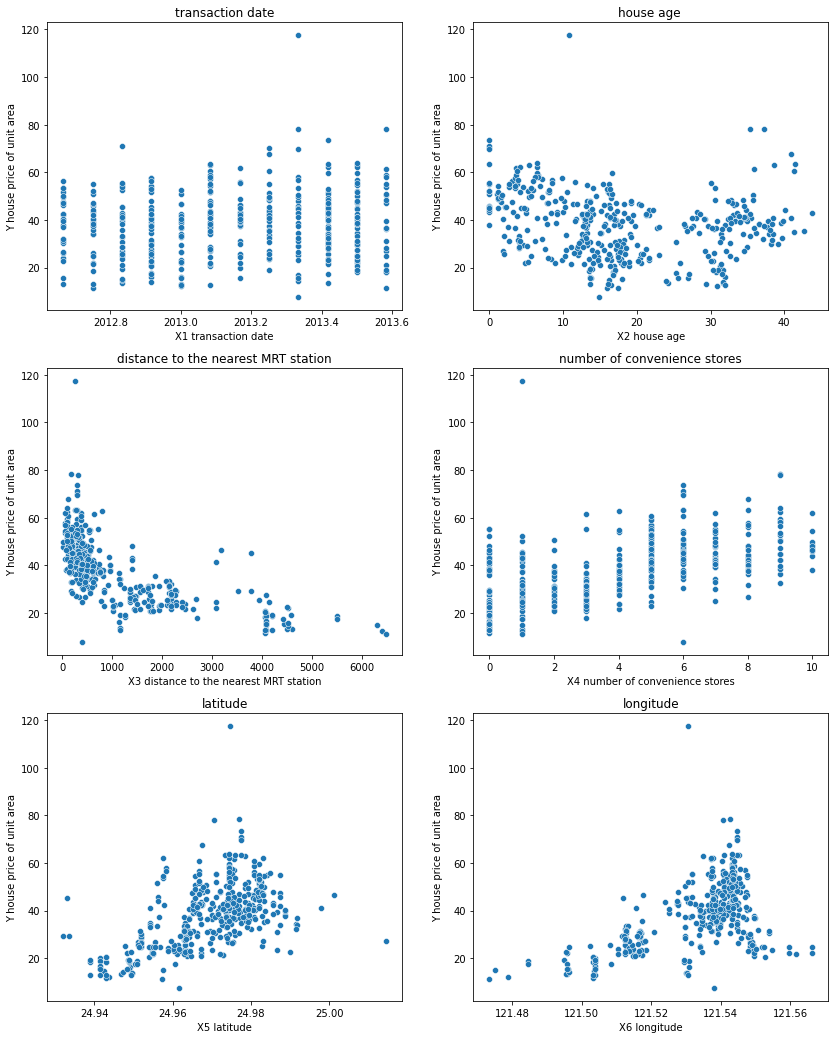

In [14]:
fig,axes=plt.subplots(3,2,figsize=(14,18))

sns.scatterplot(data = prices_df , x = 'X1 transaction date' , y = 'Y house price of unit area' , ax = axes[0,0]).set(title = 'transaction date')
sns.scatterplot(data = prices_df , x = 'X2 house age' , y = 'Y house price of unit area' , ax = axes[0,1]).set(title = 'house age ')
sns.scatterplot(data = prices_df , x = 'X3 distance to the nearest MRT station' , y = 'Y house price of unit area' , ax = axes[1,0]).set(title = 'distance to the nearest MRT station')
sns.scatterplot(data = prices_df , x = 'X4 number of convenience stores' , y = 'Y house price of unit area' , ax = axes[1,1]).set(title = 'number of convenience stores')
sns.scatterplot(data = prices_df , x = 'X5 latitude' , y = 'Y house price of unit area' , ax = axes[2,0]).set(title = 'latitude')
sns.scatterplot(data = prices_df , x = 'X6 longitude' , y = 'Y house price of unit area' , ax = axes[2,1]).set(title = 'longitude')

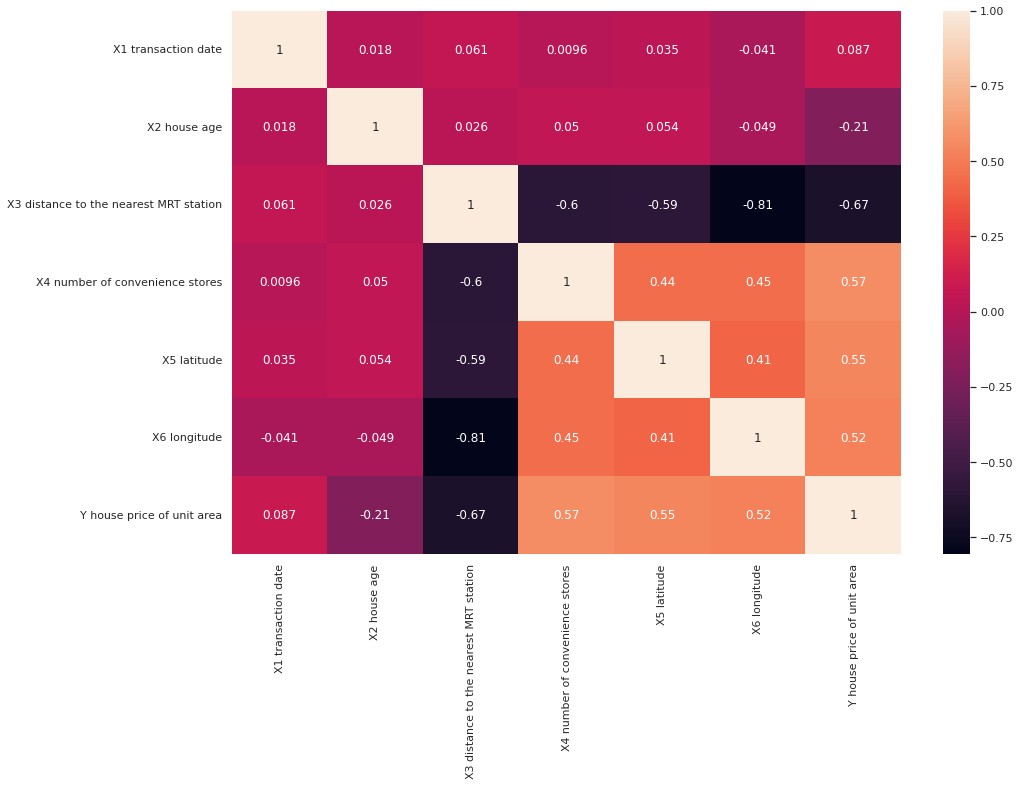

In [15]:
#Heat map to see correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=prices_df.corr(),annot=True,) 

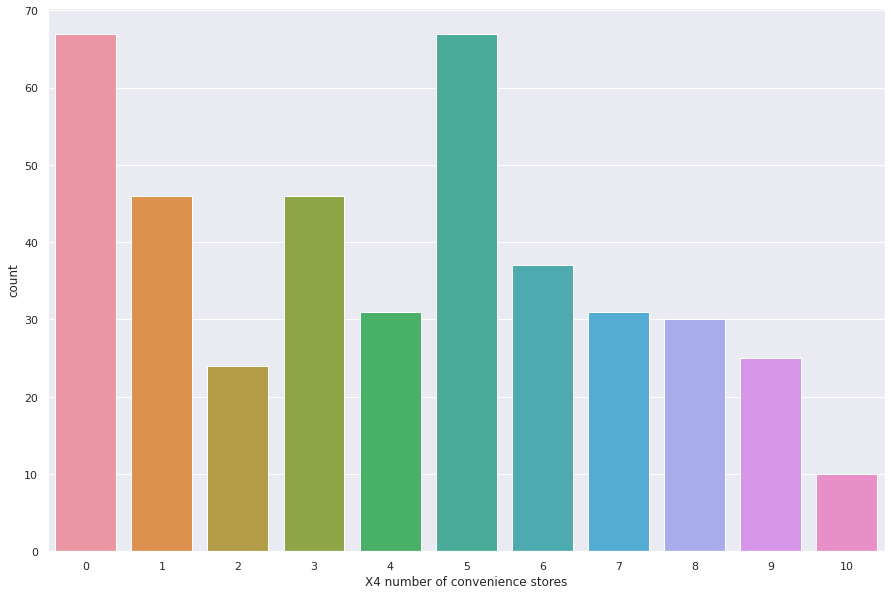

In [16]:
sns.countplot(data = prices_df ,  x = 'X4 number of convenience stores')

##***CONCLUSIONS***:

*   'X4 number of convenience stores' is the highest "Positive" correlated to the 'Y house price of unit area' .
*   While 'X3 distance to the nearest MRT station' is the highest "negative" correlated to the 'Y house price of unit area' .
*   Most houses have 5 number of convenience stores around them , or none.



## MACHINE LEARNING

In [17]:
#I)Choosing features with highest correlation
x = prices_df[['X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values
y = prices_df['Y house price of unit area'].values

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test  = train_test_split(x_poly,y, random_state = 1)

In [19]:
LR_model= linear_model.LinearRegression()

LR_model.fit(x_train,y_train)

y_pred = LR_model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 62.95954748809044
Root_mean_squared_error 7.93470525527511
r_score 0.6434277610223635
mean_absolute_error 5.946720697730781


In [21]:
from mlxtend.evaluate import bias_variance_decomp

avg_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)

print('Average Loss = ', avg_loss)
print('Average bais = ', avg_bais)
print('Average variance = ', avg_variance)

Average Loss =  187.99277719707962
Average bais =  61.289452111646206
Average variance =  126.7033250854334


***I)Choosing features with highest correlation:***

linear model: 

*   Average Loss =  71.73754721103431
*   Average bais =  70.0152674591698
*   Average variance =  1.7222797518645039

degree 2:
* Average Loss =  68.25166658008843
* Average bais =  62.48929584864781
* Average variance =  5.762370731440623

degree 3:
*  Average Loss =  187.99277719707962
*  Average bais =  61.289452111646206
*  Average variance =  126.7033250854334

CONCLUSION:
degree 2 is the better out of the three , but the bias is still high so i will add the rest of features.










In [22]:
#II)Choosing all the features 
x = prices_df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values
y = prices_df['Y house price of unit area'].values

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_poly,y, random_state = 1)

LR_model= linear_model.LinearRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

In [23]:
MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test,y_pred)
print('mean_absolute_error',MAE)

mean_squared_error 38.75967515109677
Root_mean_squared_error 6.225726877329006
r_score 0.7804840615589435
mean_absolute_error 4.967877140512259


In [24]:
avg_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)
print('Average Loss = ', avg_loss)
print('Average bais = ', avg_bais)
print('Average variance = ', avg_variance)

Average Loss =  48.591405652634876
Average bais =  39.81172447757811
Average variance =  8.779681175056767


*  Average Loss =  48.591405652634876
*  Average bais =  39.81172447757811
*  Average variance =  8.779681175056767

Still the model is high bias , one solution is increasing the number of features .